<h1><center>CS410. Mạng nueral và thuật giải di truyền</center></h1>
    
<h1><center>Multi-objective Optimization </center></h1>

<i><center>Nguyễn Văn Tiến</center></i>
<i><center>18521489</center></i>

## 1. Bài toán tối ưu hóa đa mục tiêu (Multi-objective optimization)

### Định nghĩa bài toán

Chúng ta cần tối ưu một loạt các hàm số (hàm mục tiêu - objective fucntion), các hàm số này thường có tính chất đối nghịch nhau, tức là nếu tìm được nghiệm làm hàm số này đạt được điều mong muốn thì lại khiến hàm số khác đi ngược với mong đợi.

Bài toán tối ưu hóa đa mục tiêu đi tìm lời giải sao cho nghiệm tìm được thỏa mãn các hàm mục tiêu và đạt được lời giải thỏa mãn các ràng buột và tối ưu đồng thời các hàm mục tiêu nhất có thể.

### Ví dụ

Vector $x$ có số chiều là 30, được định nghĩa $x = [x_1, x_2, ..., x_{30}]$, ta định nghĩa các hàm số và ràng buộc trên không gian $R^{5}$ như sau:

<center>
    $$f_1(x) = x_1 $$
    $$g(x) = 1 + \frac{9}{n-1}\sum_{i=2}^{n}x_i$$
    $$g(f_1, x) = 1 - \sqrt{\frac{f_1}{g}}$$
    $$0 \le x_i \le 1 \quad for \quad i = 1, ..., n$$
</center>

Hãy tìm giá trị $x^*$ sao cho tối thiểu hóa giá trị hai hàm số $f_1$ và $g(f_1, x)$.

### Cài đặt chương trình ví dụ

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#### Cài đặt các hàm mục tiêu và ràng buộc

In [57]:
# Định nghĩa hàm số f1(x)
def f1(x: np.ndarray):
    return x[1]

In [58]:
# Định nghĩa hàm số g(x)
def g_x(x: np.ndarray):
    return 1 + 9/(len(x)-1)*np.sum(x[2:])

In [59]:
# Địnhg nghĩa hàm số g(f1, x)
def g_f1(f1: float, x: np.ndarray):
    return 1 - np.sqrt(f1/g_x(x))

In [66]:
# Định nghĩa ràng buộc
def check_constraints(x):
    return all(x >= 0) and all(x <= 1)

#### Visualize hai hàm số $f_1(x)$ và $g(f1, x)$

No handles with labels found to put in legend.


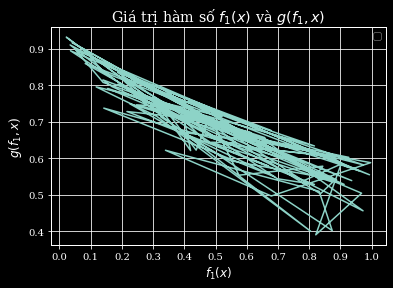

In [88]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1)

np.random.seed(seed=18521489)

# Random 100 samples
X = np.random.rand(100, 5)
    
# Calculate values of g(x) function with random vectors
value_f1_function = [f1(x=x) for x in X]
value_g_f1_x_function = [g_f1(f1=f1(x), x=x) for x in X]

ax.plot(value_f1_function, value_g_f1_x_function)

ax.set_xlabel(r"$f_1(x)$", fontsize=12)
ax.set_ylabel(r"$g(f_1, x$)", fontsize=12)
ax.set_title(r"Giá trị hàm số $f_1(x)$ và $g(f_1, x)$")
ax.legend(loc='best', labels=None)
ax.set_xticks([i/10 for i in range(11)])
ax.set_xticklabels([i/10 for i in range(11)])

plt.show()

***Chúng ta cần tìm giá trị vector $x^{*}$ sao cho tối thiểu hóa giá trị hai hàm số $f_1(x^{*})$ và $g(f_1, x^{*})$ và thỏa mãn điều kiện $0 \le x_i \le 1 \quad \forall i = 1, 2, ...,n$.***

### Khái niệm biên ```pareto```

- Giải pháp (nghiệm) lý tưởng việc tối thiểu giá trị hai hàm số $f_1(x) và g(f_1, x)$ là giải pháp tối ưu tất cả các hàm mục tiêu chúng ta đang quan tâm.

- Tuy nhiên nếu các hàm mục tiêu có tính chất đối lập trong việc tối ưu thì nghiệm lý tưởng không tồn tại. Ở ví dụ này, hai hàm só $f_1(x) và g(f_1, x)$ là hai hàm đối lập khi chúng ta mong muốn tối thiểu hóa chúng.

- Biên pareto hay tập hợp pareto là tập các nghiệm sao cho tại đó giá trị các hàm mục tiêu được tối ưu theo mong muốn. Kết quả mong đợi khi giải bài toán tối ưu hoá đa mục tiêu là đi tìm tập xấp xỉ (approximation set) có biên xấp xỉ gần đúng với biên pareto thực. Trongg thực tế, biên pareto thực của các bài toán tối ưu hóa đa mục tiêu không biết trước.

<img src="images/pareto_front.png">

## 2. Thử nghiệm thuật toán MOAE/D (**M**ulti-**o**bjective **e**volutionary **a**lgorithm based on **d**ecomposition) bằng thư viện pymoo

Reference: https://pymoo.org/algorithms/moead.html

In [70]:
# Import modules
from pymoo.algorithms.moead import MOEAD
from pymoo.factory import get_problem, get_visualization, get_reference_directions
from pymoo.optimize import minimize

In [71]:
problem = get_problem("dtlz1")

algorithm = MOEAD(
    get_reference_directions("das-dennis", 3, n_partitions=12),
    n_neighbors=15,
    decomposition="pbi",
    prob_neighbor_mating=0.7,
    seed=42,
)

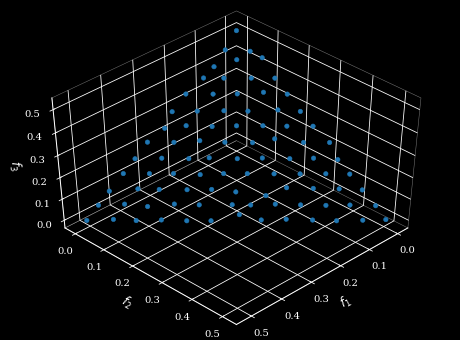

In [72]:
res = minimize(problem, algorithm, termination=('n_gen', 200), verbose=True)
get_visualization("scatter").add(res.F).show()

## 3. Thử nghiệm thuật toán NSGA2 (Non-dominated Sorting Genetic Algorithm) bằng thư viện pymoo

Reference: https://pymoo.org/algorithms/moead.html

In [73]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [75]:
problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=200)

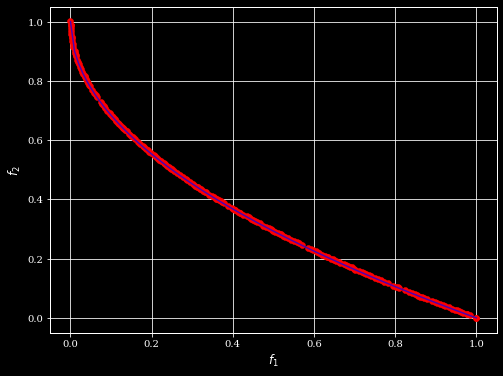

In [79]:
res = minimize(problem, algorithm, 
                ('n_gen', 200),
                seed=1,
                verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="blue", alpha=0.7)
plot.add(res.F, color='red')
plot.show()

## 4. Độ đo

Trong các bài toán được định nghĩa sẵn trong thư viên pymoo, chúng ta đã có sẵn biên pareto, nên chúng ta sử dụng khoảng cách giữa biên pareto tìm được tại thời điểm hiện tại và biên pareto thực sự làm tiêu chuẩn cho việc so sánh "độ tốt" giữa các biên pareto tìm được tại các thời điểm khác nhau.

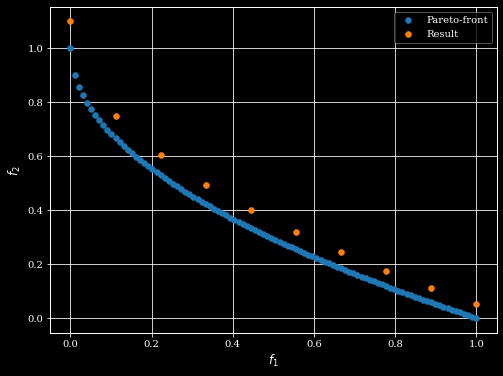

In [80]:
import numpy as np
from pymoo.factory import get_problem
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf = get_problem("zdt1").pareto_front()

# The result found by an algorithm
A = pf[::10] * 1.1

# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").add(A, label="Result").show()

- Các điểm màu xanh tạo thành biên pareto của bài toán.
- Các điểm màu vàng là nghiệm của chúng ta tìm được.
- Khi đó ta cần tính khoảng cách (distance) giữa nghiệm tìm được và nghiệm của bài toán bằng một số độ đo dưới đây.

### Generational Distance (GD)

#### Định nghĩa

Gọi $A=\{{a_1, a_2, a_3, ..., a_{|A|}}\}$ là tập nghiệm tìm được, $Z=\{z_1, z_2, z_3, ..., z_{|Z|}\}$ là tập hợp pareto (pareto set). Khi đó generational distance gd(A) được tính theo công thức:

<center>
    $$G(A) = \frac{1}{A}(\sum^{|A|}_{i=1}d_i^p)^{\frac{1}{p}}$$
</center>

trong đó $d_i$ (với p = 2) là khoảng cách Eucluid từ điểm $a_i$ tới điểm gần với nó nhất trong $Z$.

In [81]:
from pymoo.factory import get_performance_indicator

gd = get_performance_indicator("gd", pf)
print("GD", gd.calc(A))

GD 0.05497689467314528


### Generational Distance Plus (GD+)

<center>
    $$G^+(A) = \frac{1}{A}(\sum^{|A|}_{i=1}d_i^+)^{\frac{1}{2}}$$
</center>

Giống như GD gốc nhưng giá trị $d_i$ được tính bằng công thức $d_i = max\{a_i-z_i, 0\}$.

In [82]:
from pymoo.factory import get_performance_indicator

gd_plus = get_performance_indicator("gd+", pf)
print("GD+", gd_plus.calc(A))

GD+ 0.05497689467314528


### Inverted Generational Distance (IGD)

<center>
    $$IG(A) = \frac{1}{Z}(\sum^{|Z|}_{i=1}d_i^p)^{\frac{1}{p}}$$
</center>

- Thay vì tính khoảng cách từ nghiệm tìm được đến các điểm trong pareto set, chúng ta tính khoảng cách tử mỗi điểm trong pareto set đến điểm gần nhất trong tập nghiệm hiện tại.

- Cách tính này giúp chúng ta khắc phục được việc khi tập nghiệm tìm được có vài nghiệm và vài ngiệm này lại rơi chính xác vào biên pareto dẫn đến giá trị khoảng cách bằng 0.

In [83]:
from pymoo.factory import get_performance_indicator

igd = get_performance_indicator("igd", pf)
print("IGD", igd.calc(A))

IGD 0.06690908300327662


### Inverted Generational Distance Plus (IGD+)

<center>
    $$IG^+(A) = \frac{1}{Z}(\sum^{|Z|}_{i=1}d_i^+)^{\frac{1}{p}}$$
</center>

Tương như như `GD+`

In [84]:
from pymoo.factory import get_performance_indicator

igd_plus = get_performance_indicator("igd+", pf)
print("IGD+", igd_plus.calc(A))

IGD+ 0.06466828842775944


## 5. Tuning parameters

In [85]:
help(minimize)

Help on function minimize in module pymoo.optimize:

minimize(problem, algorithm, termination=None, copy_algorithm=True, copy_termination=True, **kwargs)
    Minimization of function of one or more variables, objectives and constraints.
    
    This is used as a convenience function to execute several algorithms with default settings which turned
    out to work for a test single. However, evolutionary computations utilizes the idea of customizing a
    meta-algorithm. Customizing the algorithm using the object oriented interface is recommended to improve the
    convergence.
    
    Parameters
    ----------
    
    problem : :class:`~pymoo.model.problem.Problem`
        A problem object which is defined using pymoo.
    
    algorithm : :class:`~pymoo.model.algorithm.Algorithm`
        The algorithm object that should be used for the optimization.
    
    termination : :class:`~pymoo.model.termination.Termination` or tuple
        The termination criterion that is used to stop th